# **Data Visualization of Sussex reported crimes**

**Visualizing crime data collected by the Sussex Police in UK. Data was downloaded from https://data.police.uk/data/  between 11/2019 and 11/2021.**

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import ipywidgets as widgets
from IPython.display import display,clear_output
from collections import Counter
import numpy as np

## Data Preparation

In [74]:
suffix = '-sussex-street.csv'
prefix = './data/'
Month = ['2019-11','2019-12']+['2020-0'+str(i) for i in range(1,10)]+['2020-11','2020-12']+['2021-0'+str(i) for i in range(1,10)]+['2021-11']

In [75]:
data_names = [prefix+month+suffix for month in Month]

In [76]:
df = pd.read_csv(data_names[0])
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2019-11,Sussex Police,Sussex Police,-0.229374,50.837739,On or near Park Way,E01031349,Adur 001A,Anti-social behaviour,NaN,NaN
1,8ca26f2c271663e696baa908b0c028c72ca93e43cdfc31...,2019-11,Sussex Police,Sussex Police,-0.231764,50.837253,On or near Milton Drive,E01031349,Adur 001A,Criminal damage and arson,Unable to prosecute suspect,NaN
2,e4e9fec158a474ea2002fdb155f476f114800887f9ad8a...,2019-11,Sussex Police,Sussex Police,-0.221144,50.836049,On or near Manor Close,E01031349,Adur 001A,Violence and sexual offences,Unable to prosecute suspect,NaN
3,NaN,2019-11,Sussex Police,Sussex Police,-0.231736,50.839870,On or near Southwick Street,E01031350,Adur 001B,Anti-social behaviour,NaN,NaN
4,NaN,2019-11,Sussex Police,Sussex Police,-0.230931,50.843887,On or near Summersdeane,E01031350,Adur 001B,Anti-social behaviour,NaN,NaN


## Distribution of crimes over the months

In [93]:
w = widgets.Dropdown(
    options=[data_name[7:14] for data_name in data_names],
    description='Month :',
)
plt.rcParams.update({'font.size': 20})

out = widgets.Output()

def on_change(change):
    
        if change['type'] == 'change' and change['name'] == 'value':
            with out:
                out.clear_output()
                name = prefix+change['new']+suffix
                df = pd.read_csv(name)

                crime_type = dict(Counter(df['Crime type']))
                crime_type = crime_type.keys()

                frequency_0 = df['Crime type'].value_counts(normalize=True).tolist()
                frequency_1 = df['Crime type'].value_counts(normalize=False).tolist()

                cmap = plt.get_cmap("tab20c")
                colors = cmap(np.arange(len(frequency_0)))

                fig1, ax1 = plt.subplots(2,figsize=(20, 20))
                fig1.suptitle("Distribution of Crime type in "+change['new'])


                pie = ax1[0].pie(frequency_0, startangle=0,colors=colors)

                plt.legend(pie[0],crime_type, bbox_to_anchor=(1,0.5), loc="center right", fontsize=20, 
                           bbox_transform=plt.gcf().transFigure)


                ax1[1].bar(crime_type,frequency_1,color=colors)

                fig1.autofmt_xdate()
                fig1.text(0.9, 0.15, 'AMALI', fontsize = 50,
                 color ='grey', ha ='left', va ='top',
                 alpha = 0.7)

                plt.show()

w.observe(on_change)
display(w)
display(out)

Dropdown(description='Month :', options=('2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '20…

Output()

## Evolution of number of crimes per type

In [92]:
crime_type = dict(Counter(df['Crime type']))
crime_type = crime_type.keys()

w = widgets.Dropdown(
    options=crime_type,
    description='Crime Type :'
)

out = widgets.Output()


def on_change(change):
        
        if change['type'] == 'change' and change['name'] == 'value':
            
            with out:
                out.clear_output()
                number_crimes = [dict(Counter(pd.read_csv(data_name)['Crime type']))[change['new']] for data_name in data_names]

                fig, ax = plt.subplots(figsize=(30,15))

                ax.plot(Month, number_crimes)
                plt.title("Evolution of "+change['new'])
                fig.autofmt_xdate()
                plt.show()

w.observe(on_change)
display(w)
display(out)

Dropdown(description='Crime Type :', options=('Anti-social behaviour', 'Criminal damage and arson', 'Violence …

Output()

## Evolution of number of crimes over the months

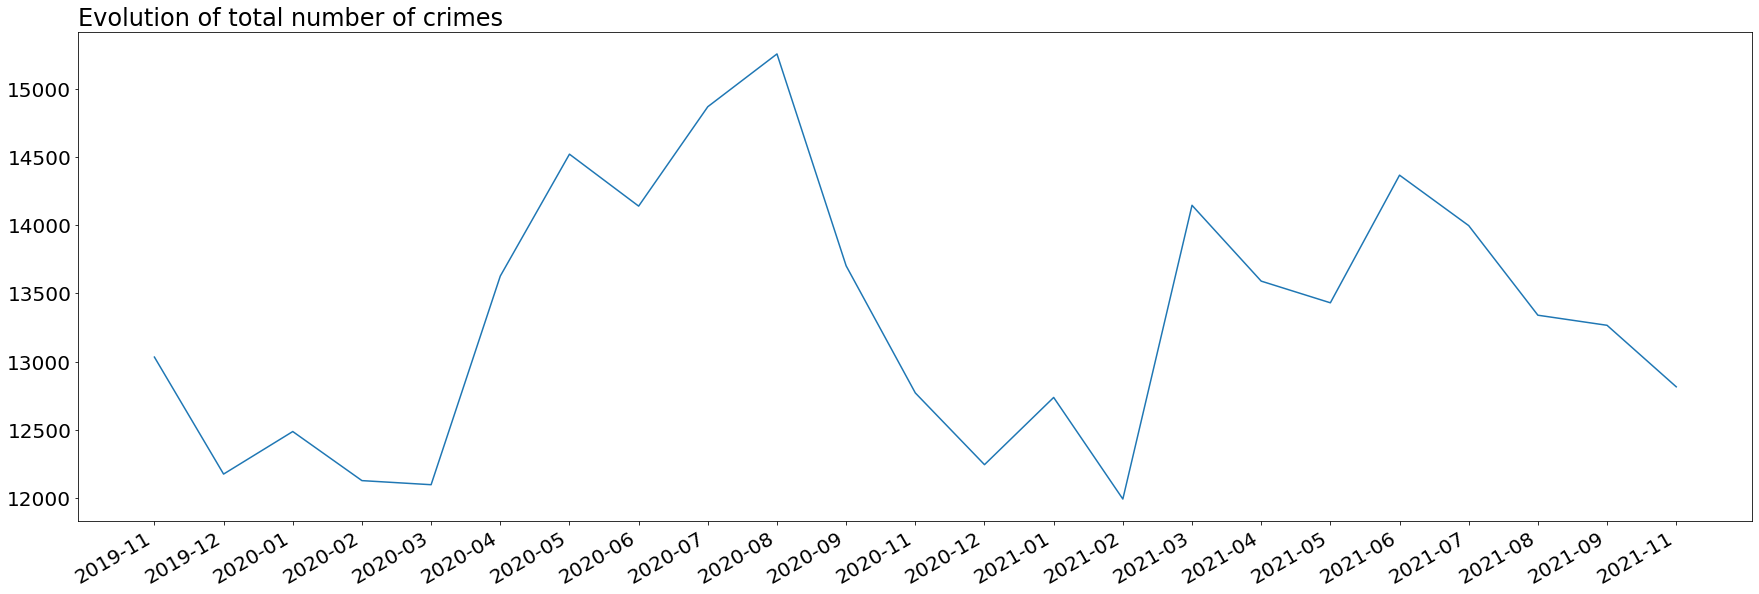

In [86]:
number_crimes = [len(pd.read_csv(data_name)) for data_name in data_names]

# Figure Size
fig, ax = plt.subplots(figsize =(30, 10))
 
# Horizontal Bar Plot
ax.plot(Month, number_crimes)

 
# Add Plot Title
ax.set_title('Evolution of total number of crimes',
             loc ='left', )
 
# Add Text watermark


fig.autofmt_xdate() 
# Show Plot
plt.show()